# Experiment 4

# Theoretical

### Imports

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from scipy.integrate import odeint

# Error Metrics
from sklearn.metrics import mean_squared_error as mse


## Part 1: Simulation of Simple Pendulum

### Deliverable 1: Defining Functions

Creating functions to find angle of pendulum and the coordinates of the pendulum location

In [ ]:
def angle_pend(t, w, theta_i, phi):
    """
    t       --> time
    w       --> anglular speed
    theta_i --> initial angle
    phi     --> phase shift

    angle that a pendulum will be at time (t)
    """
    theta = theta_i * (np.cos((w*t) + phi))

    return theta

def pend_coord(theta, l):
    """
    theta   --> angle
    l       --> length of string
    """
    x = np.sin(theta) * l
    y =  -(np.cos(theta) * l)

    return x, y

### Deliverable 2: Location vs. Time
Graphing location of pendulum vs the time for 3 periods

#### Initials

In [ ]:
# initials
g = 9.81
l = 1
theta_i = 0.01
phi = 0
simp_tpoints = np.linspace(0, 6, 1000)

w = (g/l) ** 0.5

angles = []
x_coords = []
y_coords = []

for i in simp_tpoints:
    angles.append(angle_pend(i, w, theta_i, phi))
    x_coords, y_coords = pend_coord(angles, l)

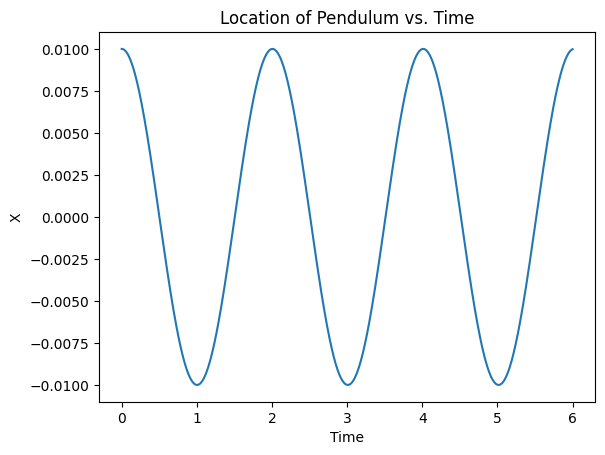

In [ ]:
# Graphing
plt.figure()

plt.plot(simp_tpoints, x_coords)

plt.title('Location of Pendulum vs. Time')
plt.xlabel('Time')
plt.ylabel('X')

plt.show()

### Deliverable 3:
Animation of Simple Pendulum

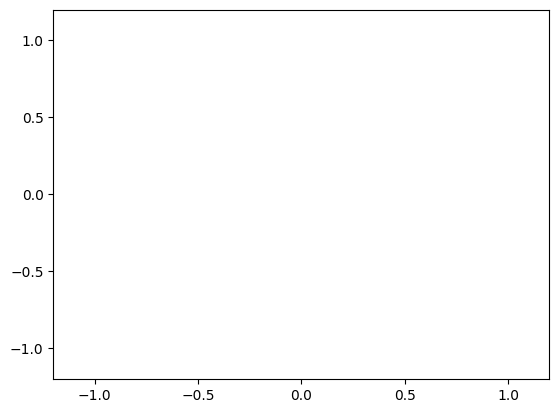

In [ ]:
# Constants
g = 9.81
l = 1

# Function to calculate angle at time t
def angle_pend(t, w, theta_i, phi):
    return theta_i * np.cos(w * t + phi)

# Function to calculate pendulum coordinates
def pend_coord(theta, l):
    x = l * np.sin(theta)
    y = -l * np.cos(theta)
    return x, y

# Initial conditions
w = (g / l) ** 0.5 # Angular velocity
theta_i = np.radians(60) #theta initial
phi = 0 # phase change

# Time points
tpoints = np.linspace(0, 6, 100)

# Calculate angles and coordinates
angles = angle_pend(tpoints, w, theta_i, phi)
x_coords, y_coords = pend_coord(angles, l)

# Animation setup
fig, ax = plt.subplots()
ax.set_xlim(-l * 1.2, l * 1.2)
ax.set_ylim(-l * 1.2, l * 1.2)
line, = ax.plot([], [], lw=2)
bob, = ax.plot([], [], 'ro', markersize=10)

def init():
    line.set_data([], [])
    bob.set_data([], [])
    return line, bob

def animate(i):
    x = [0, x_coords[i]]
    y = [0, y_coords[i]]
    line.set_data(x, y)
    bob.set_data([x_coords[i]], [y_coords[i]])  # Update bob position directly
    return line, bob

ani = animation.FuncAnimation(fig, animate, frames=len(tpoints), init_func=init, blit=True)

plt.show()

In [ ]:
# animation viewing
rc('animation', html='html5')

ani

The animation does not work just copy and paste the code into spyder

Animation works in COLAB but advised to use spyder

## Part 2: Full Pendulum

### Deliverable 4: Function
Solve the 2nd Order ODE

In [ ]:
def f(r,t):
    theta,y=r[0],r[1]
    ftheta=y
    fy= (-g/l)*(theta)
    return np.array([ftheta,fy],float)

def pendulum_coordinates(length, theta):
    x = length * np.sin(np.radians(theta))
    y = -length *np.cos(np.radians(theta))
    return x, y

### Deliverable 5: Location vs. Time

In [ ]:
g=9.81
l=1

a=0.0
b= 6 # 22.0
N=1000
h=(b-a)/N

full_tpoints=np.arange(a,b,h)
xpoints=[]
ypoints=[]

r = np.array([0.01,0.0],float)

for t in full_tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6

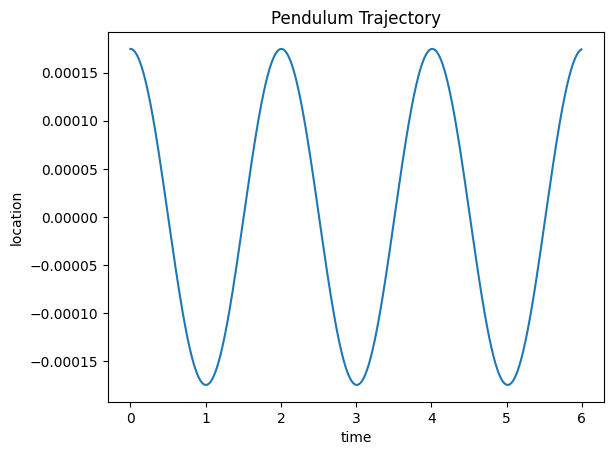

In [ ]:
# Full Pendulum Coordinates
xcoords = [pendulum_coordinates(l, theta)[0] for theta in xpoints]
ycoords = [pendulum_coordinates(l, theta)[1] for theta in xpoints]

# time points
# tpoints = np.linspace(0, 6, 1000)

# w = (g/l) ** 0.5

# angles = []
# x_coords = []
# y_coords = []

# for i in tpoints:
#     angles.append(angle_pend(i, w, theta_i, phi))
#     x_coords, y_coords = pend_coord(angles, l)

plt.figure()
# plt.scatter(x_coords, y_coords)
# plt.show()
plt.plot(full_tpoints, xcoords)
plt.xlabel('time')
plt.ylabel('location')
plt.title('Pendulum Trajectory')
plt.show()

### Deliverable 6: Combine D2 and D5 - Compare


---
##### Small Angle

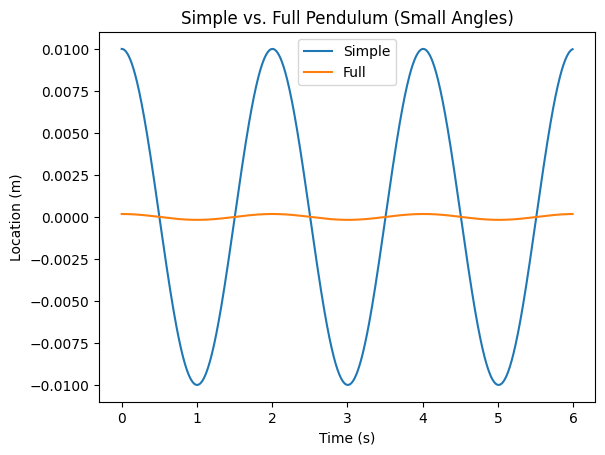

In [ ]:
plt.figure()
plt.title("Simple vs. Full Pendulum (Small Angles)")
plt.plot(simp_tpoints, x_coords, label='Simple')     # sp
plt.plot(full_tpoints, xcoords, label='Full')      #fp
plt.xlabel('Time (s)')
plt.ylabel('Location (m)')
plt.legend(loc='best')
plt.show()

---
##### Large Angle

In [ ]:
# initials
g=9.81              # gravity
l=1
theta_i = 0.99      # initial theta
phi = 0             # s - constant

a=0.0               # time start
b= 6                # time ended
N=1000              # number
h=(b-a)/N           # step size

w = (g/l) ** 0.5    # simple pend

# time points
full_tpoints = np.arange(a, b, h)
simp_tpoints = np.arange(a, b, h) # (0, 6, 1000)

# initialize empty lists for x and y
full_xpoints=[]
full_ypoints=[]
simp_xpoints = []
simp_ypoints = []

r = np.array([theta_i, 0.0], float)

for t in full_tpoints:
    full_xpoints.append(r[0])
    full_ypoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6

# == FULL ==
full_xcoords = [pendulum_coordinates(l, theta)[0] for theta in full_xpoints]
full_ycoords = [pendulum_coordinates(l, theta)[1] for theta in full_xpoints]

# == SIMPLE ==
simp_angles = []
simp_xcoords = []
simp_ycoords = []

for i in simp_tpoints:
    simp_angles.append(angle_pend(i, w, theta_i, phi))
    simp_xcoords, simp_ycoords = pend_coord(angles, l)

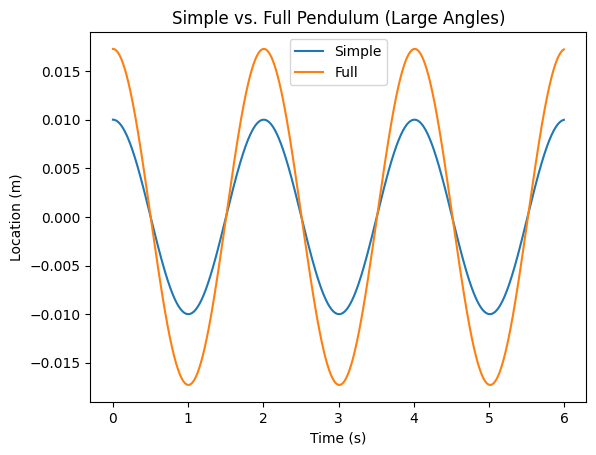

In [ ]:
plt.figure()
plt.title("Simple vs. Full Pendulum (Large Angles)")
plt.plot(simp_tpoints, simp_xcoords, label='Simple')
plt.plot(full_tpoints, full_xcoords, label='Full')
plt.xlabel('Time (s)')
plt.ylabel('Location (m)')
plt.legend(loc='best')
plt.show()



---



### Deliverable 7: Full animation

## Part 3: The Chaotic Double Pendulum

### Deliverable 8: Function for Pendulum

Creating the pendulum and includes testing plot

In [ ]:
# Pendulum Coordinates Function -- ReInitialize --
def pend_coord(theta, l):
    x = np.sin(theta) * l
    y =  -(np.cos(theta) * l)
    return x, y

In [ ]:
# initials
L1, L2 = 1, 1       # meters
m1, m2 = .2, .2     # kilograms
g = 9.81            # gravity

u0 = [-np.pi / 1.7, 0, np.pi / 1.4, 0]
# u[0] = angle of the first pendulum
# u[1] = angular velocity of the first pendulum
# u[2] = angle of the second pendulum
# u[3] = angular velocity of the second pendulum

tfinal = 10         # seconds
Nt = 10000
t = np.linspace(0, tfinal, Nt)

def doub_pend(u, t):
    du = np.zeros(4)

    du[0] = u[1]
    du[1] = (-g*(2*m1 + m2)*np.sin(u[0]) - m2*g*np.sin(u[0] - 2*u[2]) - 2*np.sin(u[0] -
            u[2])*m2*((u[2]**2)*L2 + (u[0]**2)*L1*np.cos(u[0] - u[2]))) / L1*(2*m1 + m2 - m2*np.cos(2*u[0] - 2*u[2]))
    du[2] = u[3]
    du[3] = (2 * np.sin(u[0] - u[1]) * (u[0]*L1*(m1 + m2) + g*(m1 + m2)*np.cos(u[0]) +
            (u[2]**2)*L2*m2*np.cos(u[0]-u[2]))) / L2*(2*m1 + m2 - m2*np.cos(2*u[0] - 2*u[2]))

    return du

sol = odeint(doub_pend, u0, t)

u0 = sol[:, 0]  # theta_1
u1 = sol[:, 1]  # omega 1
u2 = sol[:, 2]  # theta_2
u3 = sol[:, 3]  # omega_2

x1 = L1 * np.sin(u0);  # First Pendulum
y1 = -L1 * np.cos(u0);

x2 = x1 + L2 * np.sin(u2);  # Second Pendulum
y2 = y1 - L2 * np.cos(u2);

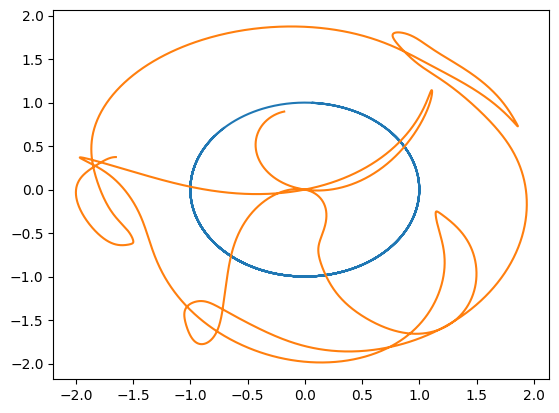

In [ ]:
# == Testing Graphing ==
plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

### Deliverable 9: Graphing 3 Periods vs. Position

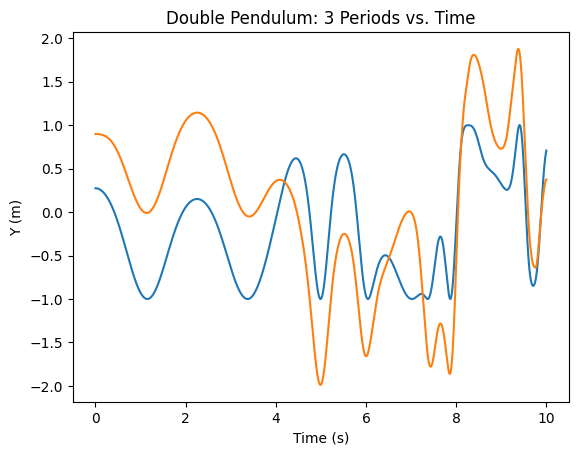

In [ ]:
plt.figure()

plt.plot(t, y1)
plt.plot(t, y2)

plt.title("Double Pendulum: 3 Periods vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Y (m)')

plt.show()

### Deliverable 10: Plots with changes

Four different plots with slight changes

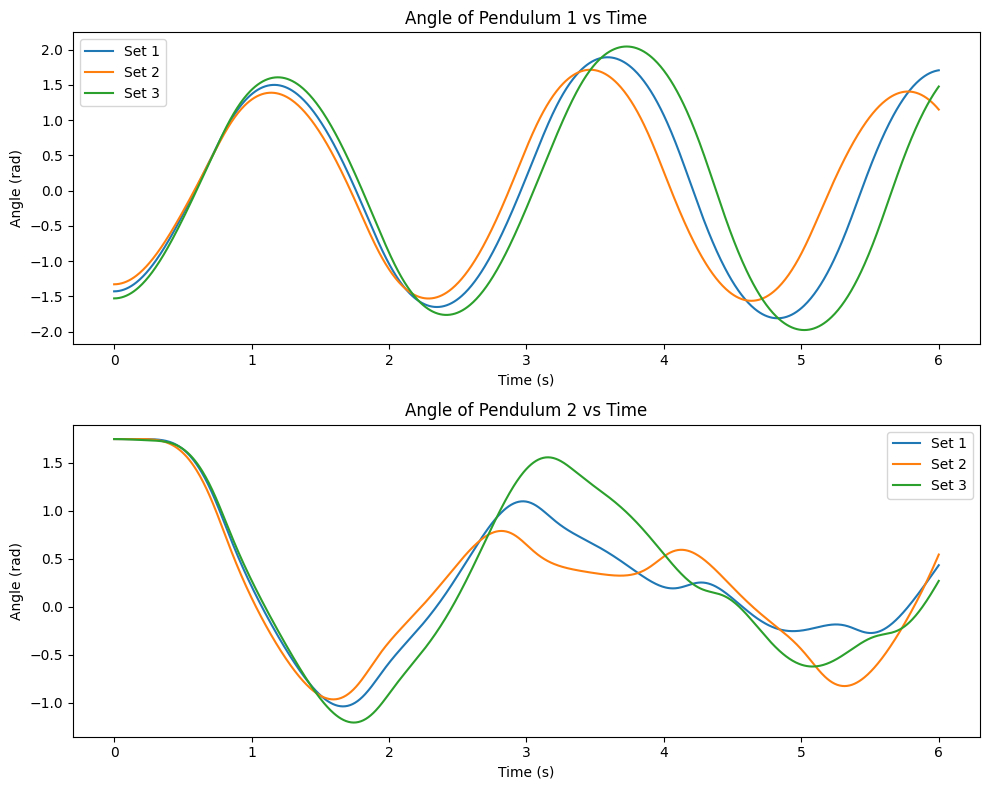

In [ ]:
# Parameters
L1, L2 = 1, 1       # meters
m1, m2 = 0.2, 0.2   # kilograms
g = 9.81            # gravity

# Initial conditions
u0_values = [
    [-np.pi / 2.2, 0, np.pi / 1.8, 0],
    [-np.pi / 2.2 + 0.1, 0, np.pi / 1.8, 0],
    [-np.pi / 2.2 - 0.1, 0, np.pi / 1.8, 0]]

# Simulation parameters
tfinal = 6         # seconds
Nt = 1000
t = np.linspace(0, tfinal, Nt)

# Function defining the double pendulum system
def doub_pend(u, t):
    du = np.zeros(4)

    du[0] = u[1]
    du[1] = (-g*(2*m1 + m2)*np.sin(u[0]) - m2*g*np.sin(u[0] - 2*u[2]) - 2*np.sin(u[0] -
            u[2])*m2*((u[2]**2)*L2 + (u[0]**2)*L1*np.cos(u[0] - u[2]))) / (L1*(2*m1 + m2 - m2*np.cos(2*u[0] - 2*u[2])))
    du[2] = u[3]
    du[3] = (2 * np.sin(u[0] - u[2]) * (u[0]*L1*(m1 + m2) + g*(m1 + m2)*np.cos(u[0]) +
            (u[2]**2)*L2*m2*np.cos(u[0]-u[2]))) / (L2*(2*m1 + m2 - m2*np.cos(2*u[0] - 2*u[2])))

    return du

# Perform simulation for each set of initial conditions
plt.figure(figsize=(10, 8))
for idx, u0 in enumerate(u0_values):
    sol = odeint(doub_pend, u0, t)
    u0 = sol[:, 0]  # theta_1
    u2 = sol[:, 2]  # theta_2

    # Plot angle of pendulum 1
    plt.subplot(2, 1, 1)
    plt.plot(t, u0, label=f'Set {idx+1}')

    # Plot angle of pendulum 2
    plt.subplot(2, 1, 2)
    plt.plot(t, u2, label=f'Set {idx+1}')

plt.subplot(2, 1, 1)
plt.title('Angle of Pendulum 1 vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Angle of Pendulum 2 vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

plt.tight_layout()
plt.show()


### Deliverable 11: Animation

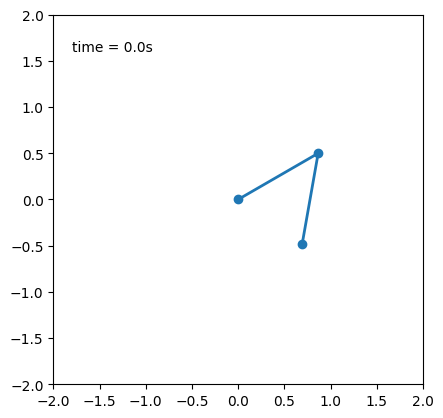

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 10  # how many seconds to simulate
history_len = 500  # how many trajectory points to display

# Function to solve the differential equations for double pendulum
def derivs(t, state):
    dydx = np.zeros_like(state)

    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * np.cos(delta) * np.cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * np.sin(delta) * np.cos(delta)
                + M2 * G * np.sin(state[2]) * np.cos(delta)
                + M2 * L2 * state[3] * state[3] * np.sin(delta)
                - (M1+M2) * G * np.sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * np.sin(delta) * np.cos(delta)
                + (M1+M2) * G * np.sin(state[0]) * np.cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * np.sin(delta)
                - (M1+M2) * G * np.sin(state[2]))
               / den2)

    return dydx

dt = 0.02
t = np.arange(0, t_stop, dt)

th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

y = np.empty((len(t), 4))
y[0] = state
for i in range(1, len(t)):
    y[i] = y[i - 1] + derivs(t[i - 1], y[i - 1]) * dt

def calculate_coordinates(y):
    x1 = L1 * np.sin(y[:, 0])
    y1 = -L1 * np.cos(y[:, 0])

    x2 = L2 * np.sin(y[:, 2]) + x1
    y2 = -L2 * np.cos(y[:, 2]) + y1

    return x1, y1, x2, y2

fig, ax = plt.subplots()
ax.set_xlim(-(L1 + L2), (L1 + L2))
ax.set_ylim( -1* (L1 + L2),  (L1 + L2))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    return line, trace, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    history_x = x2[:i]
    history_y = y2[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text

x1, y1, x2, y2 = calculate_coordinates(y)

ani_double_pendulum = animation.FuncAnimation(fig, animate, len(y), interval=dt*1000, blit=True)

plt.show()


# Backlog

In [ ]:
import numpy as np
from scipy.integrate import odeint

def pendulum_ode(y, t, l, g):
    theta, omega = y
    dydt = [omega, -g / l * np.sin(theta)]
    return dydt

def solve_pendulum_odeint(theta0, omega0):
    g = 9.81
    l = 1
    y0 = [np.radians(theta0), omega0]
    t_points = np.linspace(0,6,1000)
    sol = odeint(pendulum_ode, y0, t_points, args=(l, g))
    return t_points,sol[:,1]

t, theta_values = solve_pendulum_odeint(30, 0)

plt.figure()
plt.plot(t, theta_values)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Pendulum Motion Over Time')
plt.show()

In [ ]:
# Module 1

def function1(t,w,theta,phase_shift):
    w=(g/l)**0.5
    new_theta=(theta*(np.cos((w*t)+phase_shift)))
    return new_theta

def function2(theta,l):
    x=np.cos(theta)*l
    y=np.sin(theta)*l
    return(x,y)

print(function1(10,g,60,1))
print(function2(60,1))

In [ ]:
def f(r,t):
    theta,y=r[0],r[1]
    ftheta=y
    fy= (-g/l)*(theta)
    return np.array([ftheta,fy],float)

def pendulum_coordinates(length, theta):
    x = length * np.sin(np.radians(theta))
    y = -length *np.cos(np.radians(theta))
    return x, y

g=9.81
l=1

a=0.0
b=22.0
N=1000
h=(b-a)/N

tpoints=np.arange(a,b,h)
xpoints=[]
ypoints=[]

r=np.array([0.01,0.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6

plt.figure()
plt.plot(tpoints,xpoints,'b-')
plt.xlabel('t')
plt.ylabel('position')
plt.show()

print(tpoints)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(xpoints,ypoints,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
'Deliverable 4'
def f(r,t):
    theta,y=r[0],r[1]
    ftheta=y
    fy= (-g/l)*(theta)
    return np.array([ftheta,fy],float)

def pendulum_coordinates(length, theta):
    x = length * np.sin(np.radians(theta))
    y = -length *np.cos(np.radians(theta))
    return x, y

g=9.81
l=1

a=0.0
b=22.0
N=1000
h=(b-a)/N

tpoints=np.arange(a,b,h)
xpoints=[]
ypoints=[]

r=np.array([0.01,0.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6


'Deliverable 5'

xcoords = [pendulum_coordinates(l, theta)[0] for theta in xpoints]
ycoords = [pendulum_coordinates(l, theta)[1] for theta in xpoints]


tpoints = np.linspace(0, 6, 1000)

w = (g/l) ** 0.5

angles = []
x_coords = []
y_coords = []

for i in tpoints:
    angles.append(angle_pend(i, w, theta_i, phi))
    x_coords, y_coords = pend_coord(angles, l)

plt.figure()
plt.scatter(x_coords, y_coords)
plt.show()
plt.figure()
plt.plot(xcoords, ycoords, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Trajectory')
plt.show()





In [ ]:
plt.figure()
plt.plot(x_coords, y_coords)
plt.plot(xcoords, ycoords, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Trajectory')
plt.show()

In [ ]:
# Animation 2nd extra credit
g = 9.81
l = 1

def f(r, t):
    theta, y = r[0], r[1]
    ftheta = y
    fy = (-g / l) * np.sin(theta)
    return np.array([ftheta, fy], float)

# Integration of ODE
a = 0.0
b = 22.0
N = 1000
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []

r = np.array([np.pi/2, 0], float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6


# Pendulum coordinates function
def pendulum_coordinates(length, theta):
    x = length * np.sin(theta)
    y = -length * np.cos(theta)
    return x, y

x_coords = [pendulum_coordinates(l, theta)[0] for theta in xpoints]
y_coords = [pendulum_coordinates(l, theta)[1] for theta in xpoints]

# Animation setup
fig, ax = plt.subplots()
ax.set_xlim(-l * 1.2, l * 1.2)
ax.set_ylim(-l * 1.2, l * 1.2)
line, = ax.plot([], [], lw=3)
bob, = ax.plot([], [], 'ro', markersize=5)

def init():
    line.set_data([], [])
    bob.set_data([], [])
    return line, bob

def animate(i):
    angle = xpoints[i]
    x, y = pendulum_coordinates(l, angle)
    line.set_data([0, x], [0, y])
    bob.set_data([x], [y])
    return line, bob

ani = animation.FuncAnimation(fig, animate, frames=len(xpoints), init_func=init, blit=True, interval=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Animation')
plt.show()

Deliverable 11


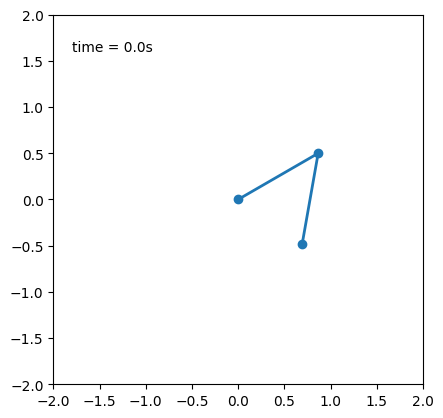

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 10  # how many seconds to simulate
history_len = 500  # how many trajectory points to display

# Function to solve the differential equations for double pendulum
def derivs(t, state):
    dydx = np.zeros_like(state)

    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * np.cos(delta) * np.cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * np.sin(delta) * np.cos(delta)
                + M2 * G * np.sin(state[2]) * np.cos(delta)
                + M2 * L2 * state[3] * state[3] * np.sin(delta)
                - (M1+M2) * G * np.sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * np.sin(delta) * np.cos(delta)
                + (M1+M2) * G * np.sin(state[0]) * np.cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * np.sin(delta)
                - (M1+M2) * G * np.sin(state[2]))
               / den2)

    return dydx

dt = 0.02
t = np.arange(0, t_stop, dt)

th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

y = np.empty((len(t), 4))
y[0] = state
for i in range(1, len(t)):
    y[i] = y[i - 1] + derivs(t[i - 1], y[i - 1]) * dt

def calculate_coordinates(y):
    x1 = L1 * np.sin(y[:, 0])
    y1 = -L1 * np.cos(y[:, 0])

    x2 = L2 * np.sin(y[:, 2]) + x1
    y2 = -L2 * np.cos(y[:, 2]) + y1

    return x1, y1, x2, y2

fig, ax = plt.subplots()
ax.set_xlim(-(L1 + L2), (L1 + L2))
ax.set_ylim( -1* (L1 + L2),  (L1 + L2))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    return line, trace, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    history_x = x2[:i]
    history_y = y2[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text

x1, y1, x2, y2 = calculate_coordinates(y)

ani_double_pendulum = animation.FuncAnimation(fig, animate, len(y), interval=dt*1000, blit=True)

plt.show()


# Experiment 4: Data Analysis

## Deliverable 17: Comparison with Experiments

Plot angle vs. time

This should result in four plots for the single pendulum experiments and eight plots of the double pendulum experiments (two angles per experiment). Make sure each of your 12 plots are clearly labelled.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def angles_double_pend(t, w, th_i, phi):
    """
    t: time
    w: angular speed
    th_i: initial angle
    phi: phase shift

    Returns the angle of the pendulum at time t
    """
    return th_i * np.cos(w * t + phi)

# Function to calculate the Cartesian coordinates of a double pendulum
def coordinates_double_pend(th, L):
    """
    th: angle of pendulum
    L: length of pendulum

    Returns the Cartesian coordinates of the mass of the double pendulum
    """
    x = L * np.sin(th)
    y = -L * np.cos(th)
    return x, y

L1 = 1.0  # length of pendulum 1 in meters
L2 = 1.0  # length of pendulum 2 in meters
g = 9.81  # acceleration due to gravity in m/s^2

# Calculate angular speeds for the double pendulum
w1 = np.sqrt(g / L1)
w2 = np.sqrt(g / L2)
w=w1=w2

theta_i = 0.01
phi = 0


# Load the datasets for the second code
data1 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/5t30b,t.csv')
time1 = data1['VideoAnalysis: Time (s)']
x_position1 = data1['VideoAnalysis: X (m)']

data2 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/5t30b,b.csv')
time2 = data2['VideoAnalysis: Time (s)']
x_position2 = data2['VideoAnalysis: X (m)']

data3 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/5t5b,t.csv')
time3 = data3['VideoAnalysis: Time (s)']
x_position3 = data3['VideoAnalysis: X (m)']

data4 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/5t5b,b.csv')
time4 = data4['VideoAnalysis: Time (s)']
x_position4 = data4['VideoAnalysis: X (m)']

data5 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/30Top , 30Bot, Top Marked.csv')
time5 = data5['VideoAnalysis: Time (s)']
x_position5 = data5['VideoAnalysis: X (m)']

data6 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/30Top, 30Bot, Bot Marked.csv')
time6 = data6['VideoAnalysis: Time (s)']
x_position6 = data6['VideoAnalysis: X (m)']

data7 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/30Top , 5Bot, Top Marked.csv')
time7 = data7['VideoAnalysis: Time (s)']
x_position7 = data7['VideoAnalysis: X (m)']

data8 = pd.read_csv('/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/30Top , 5Bot, Bot Marked.csv')
time8 = data8['VideoAnalysis: Time (s)']
x_position8 = data8['VideoAnalysis: X (m)']

plt.figure(figsize=(12, 8))

# Plot the oscillations from the first code
plt.subplot(441)
theta_i, tpoints = 5, np.linspace(31, 128, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords1 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints[::], x_coords1[::])
plt.title('Initial Angle top pendulum:5')
plt.ylabel('Angle')
plt.xlabel('Time')

plt.subplot(445)
theta_i, tpoints = 30, np.linspace(31, 118, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords2 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords2)
plt.title('Initial Angle bottom pen:30')
plt.ylabel('Angle')
plt.xlabel('Time')

plt.subplot(442)
theta_i, tpoints = 5, np.linspace(46, 136, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords3 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords3)
plt.title('Initial Angle top pendulum:5')
plt.ylabel('Angle')
plt.xlabel('Location')

plt.subplot(446)
theta_i, tpoints = 5, np.linspace(46, 143, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords4 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords4)
plt.title('Initial Angle bottom pend:5')
plt.ylabel('Angle')
plt.xlabel('Location')

plt.subplot(443)
theta_i, tpoints = 30, np.linspace(34, 129, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords5 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords5)
plt.title('Initial Angle top pendulum:30')
plt.ylabel('Angle')
plt.xlabel('Time')

plt.subplot(447)
theta_i, tpoints = 30, np.linspace(34, 129, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords6 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords6)
plt.title('Initial Angle bottom pen:30')
plt.ylabel('Angle')
plt.xlabel('Location')

plt.subplot(444)
theta_i, tpoints = 30, np.linspace(42, 128, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords7 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords7)
plt.title('Initial Angle top pendulum:30')
plt.ylabel('Angle')
plt.xlabel('Location')

plt.subplot(448)
theta_i, tpoints = 5, np.linspace(42, 128, 100)
angles = [angles_double_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords8 = [coordinates_double_pend(angle, L1)[0] for angle in angles]
plt.plot(tpoints, x_coords8)
plt.title('Initial Angle bottom pend:5')
plt.ylabel('Angle')
plt.xlabel('Location')

plt.subplot(449)
plt.plot(time1[::3], x_position1[::3])
plt.title('top pen angle:5')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,13)
plt.plot(time2[::3], x_position2[::3])
plt.title('bottom pen angle:30')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,10)
plt.plot(time3[::3], x_position3[::3])
plt.title('top pen angle:5')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,14)
plt.plot(time4[::3], x_position4[::3])
plt.title('bottom pen angle:5')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,11)
plt.plot(time5[::3], x_position5[::3])
plt.title('top pen angle:30')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,15)
plt.plot(time6[::3], x_position6[::3])
plt.title('bottom pen angle:30')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,12)
plt.plot(time7[::3], x_position7[::3])
plt.title('top pen angle:5')
plt.xlabel('Time')
plt.ylabel('Angle')

plt.subplot(4,4,16)
plt.plot(time8[::3], x_position8[::3])
plt.title('bottom pen angle:30')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/leo/opt/anaconda3/VS code/VS code/DSC 250/DSC 330 data files/10degree.csv'

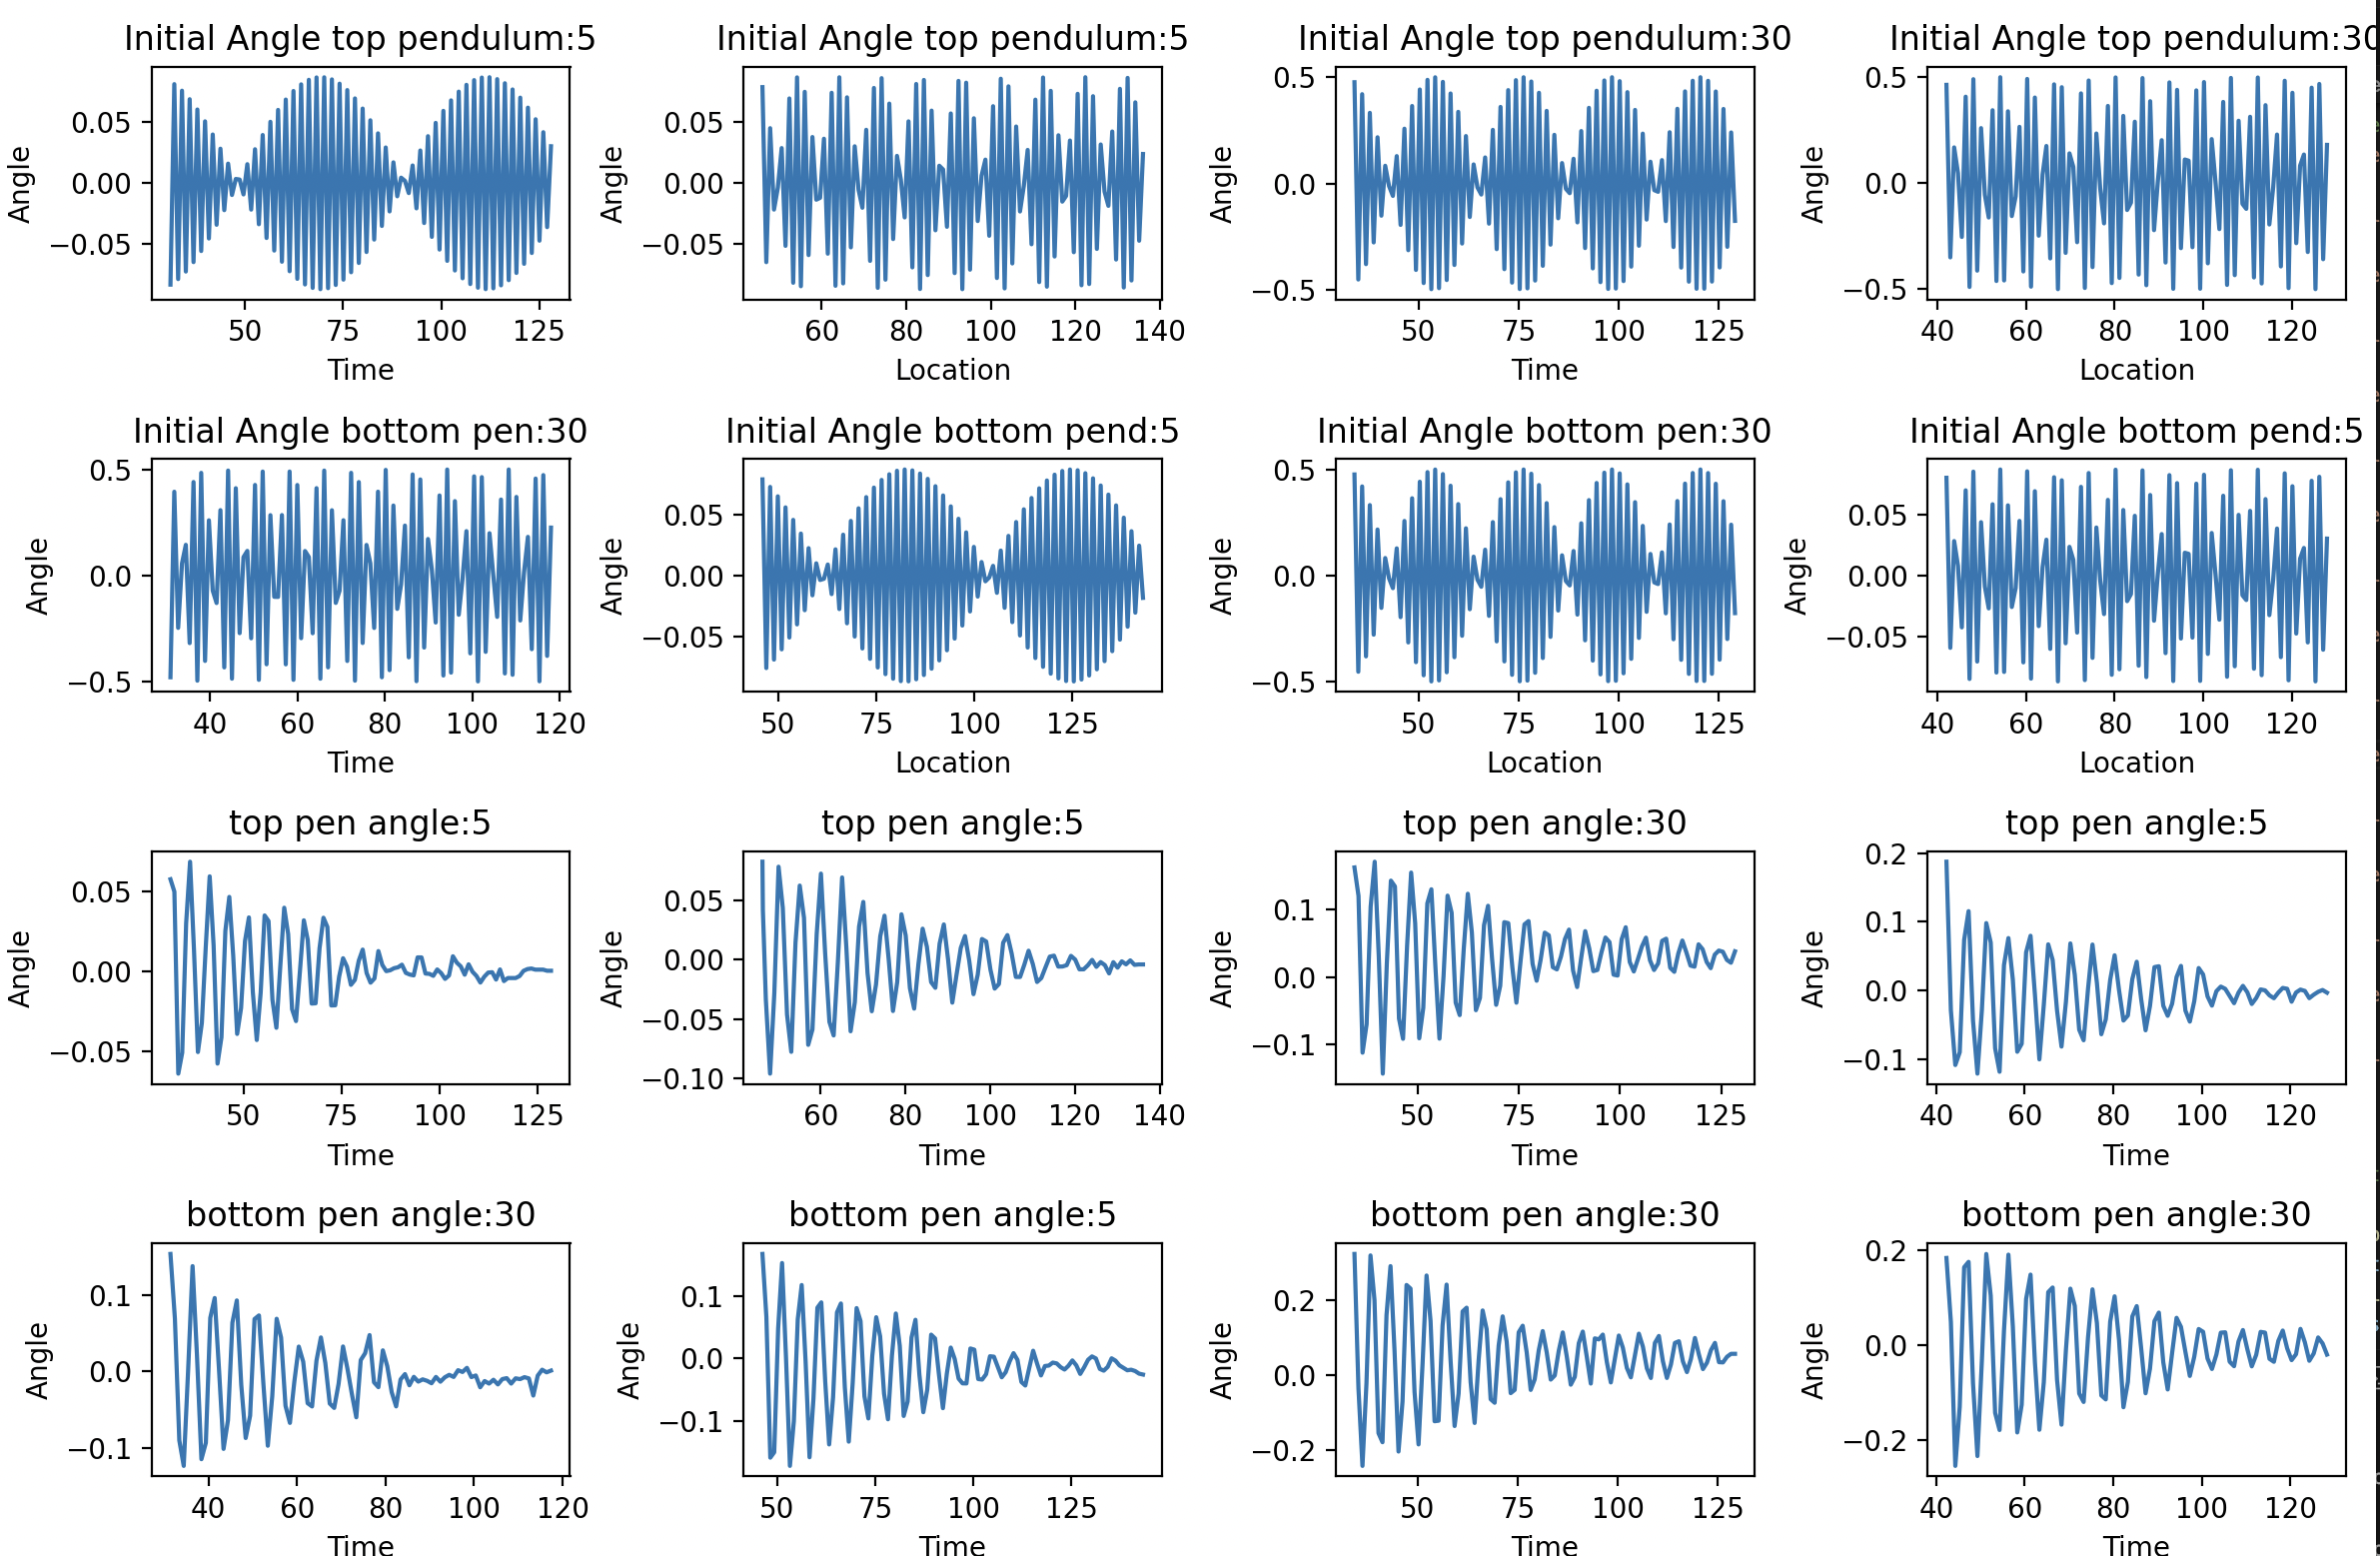

this is what it should look like, but im not fully sure if its right, i didn't clean the data.

## Deliverable 18: Error Metric

#### Error Metrics

5 Degree MSE: 0.005


10 Degree MSE: 0.018


15 Degree MSE: 0.037


20 Degree MSE: 0.062

---
== DOUBLE PENDULUM ==
---
5t5b t Degree MSE: 0.005


5t5b b Degree MSE: 0.007


5t30b t Degree MSE: 0.004


5t30b b Degree MSE: 0.130


30t5b t Degree MSE: 0.130


30t5b b Degree MSE: 0.012


30t30b t Degree MSE: 0.132


30t30b b Degree MSE: 0.140




In [ ]:
"""
Deliverable 8: Error Metrics
DSC-330
Brian Chaffee
"""
#%% == Imports ==
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse

def angle_pend(t, w, theta_i, phi):
    """
    t       --> time
    w       --> angular speed
    theta_i --> initial angle
    phi     --> phase shift

    angle that a pendulum will be at time (t)
    """
    theta = theta_i * np.cos(w * t + phi)
    return theta

def pend_coord(theta, l):
    """
    theta   --> angle
    l       --> length of string
    """
    x = np.sin(theta) * l
    y = -np.cos(theta) * l
    return x, y

g = 9.81
l = 1
phi = 0

# Calculate angular speed
w = np.sqrt(g / l)

#%% == Data ==

# Load the datasets for the second code
data1 = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/5degree.csv')
time_exp1 = data1['VideoAnalysis: Time (s)']
x_position1 = data1['VideoAnalysis: X (m)']

data2 = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/10degree.csv')
time_exp2 = data2['VideoAnalysis: Time (s)']
x_position2 = data2['VideoAnalysis: X (m)']

data3 = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/15degree.csv')
time_exp3 = data3['VideoAnalysis: Time (s)']
x_position3 = data3['VideoAnalysis: X (m)']

data4 = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/20degree.csv')
time_exp4 = data4['VideoAnalysis: Time (s)']
x_position4 = data4['VideoAnalysis: X (m)']

#%% ============= Double Pendulum =================

data55t = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/5t5b,t.csv')
time_exp55t = data55t['VideoAnalysis: Time (s)']
x_position55t = data55t['VideoAnalysis: X (m)']

data55b = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/5t5b,b.csv')
time_exp55b = data55b['VideoAnalysis: Time (s)']
x_position55b = data55b['VideoAnalysis: X (m)']

data530t = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/5t30b,t.csv')
time_exp530t = data530t['VideoAnalysis: Time (s)']
x_position530t = data530t['VideoAnalysis: X (m)']

data530b = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/5t30b,b.csv')
time_exp530b = data530b['VideoAnalysis: Time (s)']
x_position530b = data530b['VideoAnalysis: X (m)']

data305t = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/30Top , 5Bot, Top Marked.csv')
time_exp305t = data305t['VideoAnalysis: Time (s)']
x_position305t = data305t['VideoAnalysis: X (m)']

data305b = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/30Top , 5Bot, Bot Marked.csv')
time_exp305b = data305b['VideoAnalysis: Time (s)']
x_position305b = data305b['VideoAnalysis: X (m)']

data3030t = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/30Top , 30Bot, Top Marked.csv')
time_exp3030t = data3030t['VideoAnalysis: Time (s)']
x_position3030t = data3030t['VideoAnalysis: X (m)']

data3030b = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/30Top , 30Bot, Bot Marked.csv')
time_exp3030b = data3030b['VideoAnalysis: Time (s)']
x_position3030b = data3030b['VideoAnalysis: X (m)']

#%%

# Function to align simulated data with experimental data
def align_data(time_exp, x_position, theta_i):
    angles = [angle_pend(t, w, np.radians(theta_i), phi) for t in time_exp]
    x_coords = [pend_coord(angle, l)[0] for angle in angles]
    return x_coords

# Align simulated data with experimental data for each initial angle
x_coords1 = align_data(time_exp1, x_position1, 5)
x_coords2 = align_data(time_exp2, x_position2, 10)
x_coords3 = align_data(time_exp3, x_position3, 15)
x_coords4 = align_data(time_exp4, x_position4, 20)

# == Double Pendulum ==
x_coords5 = align_data(time_exp55t, x_position55t, 5)
x_coords6 = align_data(time_exp55b, x_position55b, 5)

x_coords7 = align_data(time_exp530t, x_position530t, 5)
x_coords8 = align_data(time_exp530b, x_position530b, 30)

x_coords9 = align_data(time_exp305t, x_position305t, 30)
x_coords10 = align_data(time_exp305b, x_position305b, 5)

x_coords11 = align_data(time_exp3030t, x_position3030t, 30)
x_coords12 = align_data(time_exp3030b, x_position3030b, 30)

# Calculate Mean Squared Error (MSE) for each initial angle
mse1 = mse(x_coords1, x_position1)
mse2 = mse(x_coords2, x_position2)
mse3 = mse(x_coords3, x_position3)
mse4 = mse(x_coords4, x_position4)
# == Double Pendulum ==
mse55t = mse(x_coords5, x_position55t)
mse55b = mse(x_coords6, x_position55b)

mse530t = mse(x_coords7, x_position530t)
mse530b = mse(x_coords8, x_position530b)

mse305t = mse(x_coords9, x_position305t)
mse305b = mse(x_coords10, x_position305b)

mse3030t = mse(x_coords11, x_position3030t)
mse3030b = mse(x_coords12, x_position3030b)



print("=== Error Metrics ===")
print("5 Degree MSE: {0:.3f}".format(mse1))
print("======================")
print("10 Degree MSE: {0:.3f}".format(mse2))
print("======================")
print("15 Degree MSE: {0:.3f}".format(mse3))
print("======================")
print("20 Degree MSE: {0:.3f}".format(mse4))
print("======================")
print("\n\n == DOUBLE PENDULUM ==")
print("5t5b t Degree MSE: {0:.3f}".format(mse55t))
print("======================")
print("5t5b b Degree MSE: {0:.3f}".format(mse55b))
print("======================")

print("5t30b t Degree MSE: {0:.3f}".format(mse530t))
print("======================")
print("5t30b b Degree MSE: {0:.3f}".format(mse530b))
print("======================")

print("30t5b t Degree MSE: {0:.3f}".format(mse305t))
print("======================")
print("30t5b b Degree MSE: {0:.3f}".format(mse305b))
print("======================")

print("30t30b t Degree MSE: {0:.3f}".format(mse3030t))
print("======================")
print("30t30b b Degree MSE: {0:.3f}".format(mse3030b))
print("======================")



## Deliverable 19

In [ ]:

def second_derivative_central_difference(angles, times):
    n = len(times)
    dt = times[1] - times[0]
    second_derivatives = np.zeros(n)

    for i in range(1, n-1):
        second_derivatives[i] = (angles[i-1] - 2*angles[i] + angles[i+1]) / (dt**2)

    # Handling the boundary points
    second_derivatives[0] = (2*angles[0] - 5*angles[1] + 4*angles[2] - angles[3]) / (dt**2)
    second_derivatives[-1] = (2*angles[-1] - 5*angles[-2] + 4*angles[-3] - angles[-4]) / (dt**2)

    return second_derivatives

# Function to compute theoretical second derivative based on the analytical expression
def theoretical_second_derivative(times, w, theta_i):
    return -w**2 * theta_i * np.cos(w * times)

# Calculate theoretical second derivatives for each set of angles
theoretical_second_derivatives1 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives2 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives3 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives4 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives5 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives6 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives7 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))
theoretical_second_derivatives8 = theoretical_second_derivative(tpoints, w, np.radians(theta_i))

# Compute numerical second derivatives for each set of angles
second_derivatives1 = second_derivative_central_difference(x_coords1, tpoints)
second_derivatives2 = second_derivative_central_difference(x_coords2, tpoints)
second_derivatives3 = second_derivative_central_difference(x_coords3, tpoints)
second_derivatives4 = second_derivative_central_difference(x_coords4, tpoints)
second_derivatives5 = second_derivative_central_difference(x_coords5, tpoints)
second_derivatives6 = second_derivative_central_difference(x_coords6, tpoints)
second_derivatives7 = second_derivative_central_difference(x_coords7, tpoints)
second_derivatives8 = second_derivative_central_difference(x_coords8, tpoints)

# Calculate the error between numerical and theoretical second derivatives
error1 = np.abs(second_derivatives1 - theoretical_second_derivatives1)
error2 = np.abs(second_derivatives2 - theoretical_second_derivatives2)
error3 = np.abs(second_derivatives3 - theoretical_second_derivatives3)
error4 = np.abs(second_derivatives4 - theoretical_second_derivatives4)
error5 = np.abs(second_derivatives5 - theoretical_second_derivatives5)
error6 = np.abs(second_derivatives6 - theoretical_second_derivatives6)
error7 = np.abs(second_derivatives7 - theoretical_second_derivatives7)
error8 = np.abs(second_derivatives8 - theoretical_second_derivatives8)

# Calculate error metrics
mae1 = np.mean(error1)
mae2 = np.mean(error2)
mae3 = np.mean(error3)
mae4 = np.mean(error4)
mae5 = np.mean(error5)
mae6 = np.mean(error6)
mae7 = np.mean(error7)
mae8 = np.mean(error8)

rmse1 = np.sqrt(np.mean(error1**2))
rmse2 = np.sqrt(np.mean(error2**2))
rmse3 = np.sqrt(np.mean(error3**2))
rmse4 = np.sqrt(np.mean(error4**2))
rmse5 = np.sqrt(np.mean(error5**2))
rmse6 = np.sqrt(np.mean(error6**2))
rmse7 = np.sqrt(np.mean(error7**2))
rmse8 = np.sqrt(np.mean(error8**2))

# Plot the comparison between numerical and theoretical second derivatives
plt.figure(figsize=(12, 8))

plt.subplot(211)
plt.plot(tpoints, second_derivatives1, label='Numerical')
plt.plot(tpoints, theoretical_second_derivatives1, label='Theoretical')
plt.title('Comparison of Second Derivatives - Case 1')
plt.xlabel('Time')
plt.ylabel('Second Derivative')
plt.legend()

plt.subplot(212)
plt.plot(tpoints, error1)
plt.title('Error - Case 1')
plt.xlabel('Time')
plt.ylabel('Absolute Error')

# Repeat the above steps for other cases (2-8)

# Display error metrics
print("Mean Absolute Error (MAE) - Case 1:", mae1)
print("Root Mean Square Error (RMSE) - Case 1:", rmse1)
# Repeat for other cases (2-8)

plt.tight_layout()
plt.show()




## Deliverable 20:

In [ ]:
"""
Deliverable 20
DSC-330
Brian Chaffee
"""
#%% == Imports ==
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def angle_pend(t, w, theta_i, phi):
    """
    t       --> time
    w       --> angular speed
    theta_i --> initial angle
    phi     --> phase shift

    angle that a pendulum will be at time (t)
    """
    theta = theta_i * np.cos(w * t + phi)
    return theta

def pend_coord(theta, l):
    """
    theta   --> angle
    l       --> length of string
    """
    x = np.sin(theta) * l
    y = -np.cos(theta) * l
    return x, y

# Initial conditions
g = 9.81
l = 1
phi = 0

# Calculate angular speed
w = np.sqrt(g / l)

# Load the datasets for the second code
data1 = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/5degree.csv')
time1 = data1['VideoAnalysis: Time (s)']
x_position1 = data1['VideoAnalysis: X (m)']

data4 = pd.read_csv('/Users/brianchaffee/Data Science/DSC-330/Experiment 4/data/20degree.csv')
time4 = data4['VideoAnalysis: Time (s)']
x_position4 = data4['VideoAnalysis: X (m)']

#%% ==

plt.figure(figsize=(12, 8))

# Small Angle
#plt.subplot(121)
theta_i, tpoints = 5, np.linspace(5, 150, 100)
angles = [angle_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords1 = [pend_coord(angle, l)[0] for angle in angles]
plt.plot(tpoints[::], x_coords1[::], '-.', label='Simple (5 deg)')
plt.plot(time1[::5], x_position1[::5], label='Experimental (5 deg)')
plt.legend(loc='best')


# Large Angle
#plt.subplot(122)
theta_i, tpoints = 20, np.linspace(5, 150, 100)
angles = [angle_pend(t, w, np.radians(theta_i), phi) for t in tpoints]
x_coords2 = [pend_coord(angle, l)[0] for angle in angles]
plt.plot(tpoints[::], x_coords2[::], '--', label='Simple (20 deg)', alpha=0.5)
plt.plot(time4[::5], x_position4[::5], label='Experimental (20 deg)')

plt.legend(loc='best')
plt.title('Comparison of Large vs Small Angles', weight='bold', fontsize='xx-large')
plt.xlabel('Time (s)')
plt.ylabel('Postion (m)')
plt.show()


# %%


# Backlog

In [ ]:
import numpy as np
from scipy.integrate import odeint

def pendulum_ode(y, t, l, g):
    theta, omega = y
    dydt = [omega, -g / l * np.sin(theta)]
    return dydt

def solve_pendulum_odeint(theta0, omega0):
    g = 9.81
    l = 1
    y0 = [np.radians(theta0), omega0]
    t_points = np.linspace(0,6,1000)
    sol = odeint(pendulum_ode, y0, t_points, args=(l, g))
    return t_points,sol[:,1]

t, theta_values = solve_pendulum_odeint(30, 0)

plt.figure()
plt.plot(t, theta_values)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Pendulum Motion Over Time')
plt.show()

In [ ]:
# Module 1

def function1(t,w,theta,phase_shift):
    w=(g/l)**0.5
    new_theta=(theta*(np.cos((w*t)+phase_shift)))
    return new_theta

def function2(theta,l):
    x=np.cos(theta)*l
    y=np.sin(theta)*l
    return(x,y)

print(function1(10,g,60,1))
print(function2(60,1))

In [ ]:
def f(r,t):
    theta,y=r[0],r[1]
    ftheta=y
    fy= (-g/l)*(theta)
    return np.array([ftheta,fy],float)

def pendulum_coordinates(length, theta):
    x = length * np.sin(np.radians(theta))
    y = -length *np.cos(np.radians(theta))
    return x, y

g=9.81
l=1

a=0.0
b=22.0
N=1000
h=(b-a)/N

tpoints=np.arange(a,b,h)
xpoints=[]
ypoints=[]

r=np.array([0.01,0.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6

plt.figure()
plt.plot(tpoints,xpoints,'b-')
plt.xlabel('t')
plt.ylabel('position')
plt.show()

print(tpoints)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(xpoints,ypoints,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
'Deliverable 4'
def f(r,t):
    theta,y=r[0],r[1]
    ftheta=y
    fy= (-g/l)*(theta)
    return np.array([ftheta,fy],float)

def pendulum_coordinates(length, theta):
    x = length * np.sin(np.radians(theta))
    y = -length *np.cos(np.radians(theta))
    return x, y

g=9.81
l=1

a=0.0
b=22.0
N=1000
h=(b-a)/N

tpoints=np.arange(a,b,h)
xpoints=[]
ypoints=[]

r=np.array([0.01,0.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6


'Deliverable 5'

xcoords = [pendulum_coordinates(l, theta)[0] for theta in xpoints]
ycoords = [pendulum_coordinates(l, theta)[1] for theta in xpoints]


tpoints = np.linspace(0, 6, 1000)

w = (g/l) ** 0.5

angles = []
x_coords = []
y_coords = []

for i in tpoints:
    angles.append(angle_pend(i, w, theta_i, phi))
    x_coords, y_coords = pend_coord(angles, l)

plt.figure()
plt.scatter(x_coords, y_coords)
plt.show()
plt.figure()
plt.plot(xcoords, ycoords, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Trajectory')
plt.show()





In [ ]:
plt.figure()
plt.plot(x_coords, y_coords)
plt.plot(xcoords, ycoords, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Trajectory')
plt.show()

In [ ]:
# Animation 2nd extra credit
g = 9.81
l = 1

def f(r, t):
    theta, y = r[0], r[1]
    ftheta = y
    fy = (-g / l) * np.sin(theta)
    return np.array([ftheta, fy], float)

# Integration of ODE
a = 0.0
b = 22.0
N = 1000
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []

r = np.array([np.pi/2, 0], float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6


# Pendulum coordinates function
def pendulum_coordinates(length, theta):
    x = length * np.sin(theta)
    y = -length * np.cos(theta)
    return x, y

x_coords = [pendulum_coordinates(l, theta)[0] for theta in xpoints]
y_coords = [pendulum_coordinates(l, theta)[1] for theta in xpoints]

# Animation setup
fig, ax = plt.subplots()
ax.set_xlim(-l * 1.2, l * 1.2)
ax.set_ylim(-l * 1.2, l * 1.2)
line, = ax.plot([], [], lw=3)
bob, = ax.plot([], [], 'ro', markersize=5)

def init():
    line.set_data([], [])
    bob.set_data([], [])
    return line, bob

def animate(i):
    angle = xpoints[i]
    x, y = pendulum_coordinates(l, angle)
    line.set_data([0, x], [0, y])
    bob.set_data([x], [y])
    return line, bob

ani = animation.FuncAnimation(fig, animate, frames=len(xpoints), init_func=init, blit=True, interval=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Animation')
plt.show()

Deliverable 11


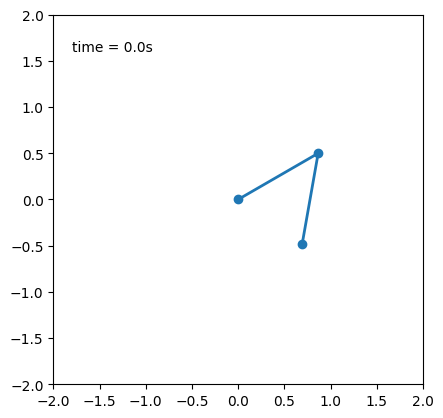

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 10  # how many seconds to simulate
history_len = 500  # how many trajectory points to display

# Function to solve the differential equations for double pendulum
def derivs(t, state):
    dydx = np.zeros_like(state)

    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * np.cos(delta) * np.cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * np.sin(delta) * np.cos(delta)
                + M2 * G * np.sin(state[2]) * np.cos(delta)
                + M2 * L2 * state[3] * state[3] * np.sin(delta)
                - (M1+M2) * G * np.sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * np.sin(delta) * np.cos(delta)
                + (M1+M2) * G * np.sin(state[0]) * np.cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * np.sin(delta)
                - (M1+M2) * G * np.sin(state[2]))
               / den2)

    return dydx

dt = 0.02
t = np.arange(0, t_stop, dt)

th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

y = np.empty((len(t), 4))
y[0] = state
for i in range(1, len(t)):
    y[i] = y[i - 1] + derivs(t[i - 1], y[i - 1]) * dt

def calculate_coordinates(y):
    x1 = L1 * np.sin(y[:, 0])
    y1 = -L1 * np.cos(y[:, 0])

    x2 = L2 * np.sin(y[:, 2]) + x1
    y2 = -L2 * np.cos(y[:, 2]) + y1

    return x1, y1, x2, y2

fig, ax = plt.subplots()
ax.set_xlim(-(L1 + L2), (L1 + L2))
ax.set_ylim( -1* (L1 + L2),  (L1 + L2))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    trace.set_data([], [])
    time_text.set_text('')
    return line, trace, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    history_x = x2[:i]
    history_y = y2[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text

x1, y1, x2, y2 = calculate_coordinates(y)

ani_double_pendulum = animation.FuncAnimation(fig, animate, len(y), interval=dt*1000, blit=True)

plt.show()
